<a href="https://colab.research.google.com/github/mavillan/gb-vpp/blob/main/models/gb-vpp-lstm-gru-tangle-2h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

!pip install --upgrade kaggle > /dev/null 2>&1
!mkdir -p ~/.kaggle/ && cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [2]:
!pip uninstall -y tensorflow 
!pip install tensorflow==2.4.3 > /dev/null 2>&1
!pip install tensorflow-addons > /dev/null 2>&1
!pip install --upgrade pandas > /dev/null 2>&1

import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  tf.config.experimental_connect_to_cluster(tpu)
  tf.tpu.experimental.initialize_tpu_system(tpu)
  tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

import os
from tensorflow.python.profiler import profiler_client
#tpu_profile_service_address = os.environ['COLAB_TPU_ADDR'].replace('8470', '8466')
#print(profiler_client.monitor(tpu_profile_service_address, 100, 2))

Found existing installation: tensorflow 2.4.3
Uninstalling tensorflow-2.4.3:
  Successfully uninstalled tensorflow-2.4.3
Tensorflow version 2.4.3
INFO:tensorflow:Initializing the TPU system: grpc://10.70.203.26:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.70.203.26:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Running on TPU  ['10.70.203.26:8470']


In [3]:
!mkdir -p input/
!kaggle competitions download -c ventilator-pressure-prediction -p input/ --force

!unzip -o input/sample_submission.csv.zip -d input/
!unzip -o input/train.csv.zip -d input/
!unzip -o input/test.csv.zip -d input/

 99% 138M/139M [00:00<00:00, 140MB/s]
100% 139M/139M [00:00<00:00, 157MB/s]
 99% 75.0M/75.4M [00:00<00:00, 84.5MB/s]
100% 75.4M/75.4M [00:00<00:00, 128MB/s] 
  0% 0.00/8.50M [00:00<?, ?B/s]
100% 8.50M/8.50M [00:00<00:00, 136MB/s]
Archive:  input/sample_submission.csv.zip
  inflating: input/sample_submission.csv  
Archive:  input/train.csv.zip
  inflating: input/train.csv         
Archive:  input/test.csv.zip
  inflating: input/test.csv          


In [4]:
!kaggle datasets download --unzip --force -d mavillan/gb-vpp-folds-split

  0% 0.00/11.5M [00:00<?, ?B/s]
100% 11.5M/11.5M [00:00<00:00, 99.7MB/s]


In [5]:
input_path = "input"
subs_path = "/content/drive/MyDrive/kaggle/gb-vpp/subs"
results_path = "/content/drive/MyDrive/kaggle/gb-vpp/results"
artifacts_path = "/content/drive/MyDrive/kaggle/gb-vpp/artifacts"

In [6]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        715M        3.7G        1.1M        8.3G         11G
Swap:            0B          0B          0B


***

In [7]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
from glob import glob

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import Callback

from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import RobustScaler, normalize
from sklearn.model_selection import train_test_split, GroupKFold, KFold
from sklearn.preprocessing import LabelEncoder

from IPython.display import display

In [8]:
def reduce_mem_usage(df, verbose=False):
    """
    Utility function to reduce the memory usage of pandas dataframes
    
    Parameters
    ----------
    df: pandas.Dataframe
    verbose: Boolean
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: 
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

***
## data preparation

In [9]:
class config:
    # data params
    SEQ_LEN = 80

    # train params
    EPOCHS = 300
    BATCH_SIZE = 512
    SCHEDULER_PATIENCE = 10
    SCHEDULER_FACTOR = 0.8
    STOPPING_PATIENCE = 35
    
    # others
    MODEL_ID = "lstm-gru-tangle-2h"
    DEBUG = False
    
if config.DEBUG:
    config.EPOCHS = 2


In [10]:
with open("./split_10folds_seed23.pkl", "rb") as file:
    split = pickle.load(file)

In [11]:
train_raw = pd.read_csv(f'{input_path}/train.csv')
test_raw = pd.read_csv(f'{input_path}/test.csv')
submission = pd.read_csv(f'{input_path}/sample_submission.csv')

In [12]:
PRESSURE_VALUES = np.sort(train_raw.pressure.unique())

PRESSURE_MIN = train_raw.pressure.min()
PRESSURE_MAX = train_raw.pressure.max()
PRESSURE_STEP = PRESSURE_VALUES[1]-PRESSURE_VALUES[0]

def pressure_to_idx(array):
    return ((array - PRESSURE_MIN) / PRESSURE_STEP).astype(int)

def idx_to_pressure(array):
    return (array * PRESSURE_STEP) + PRESSURE_MIN

In [13]:
mapping = {j:i for i,j in enumerate(train_raw.breath_id.unique())}
train_raw["breath_id"] = train_raw.breath_id.map(mapping)

if config.SEQ_LEN < 80:

    train_raw = (
        train_raw
        .sort_values(["breath_id","time_step"])
        .groupby("breath_id")
        .head(config.SEQ_LEN)
        .reset_index(drop=True)
    )
    test_raw = (
        test_raw
        .sort_values(["breath_id","time_step"])
        .groupby("breath_id")
        .head(config.SEQ_LEN)
        .reset_index(drop=True)
    )

In [14]:
def compute_feats(df):
    df['cross1']= df['u_in'] * df['u_out']
    df['cross2']= df['u_in'] * (1-df['u_out'])

    df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()
    df['u_in_cummean'] = df['u_in_cumsum'] / (df.groupby("breath_id")["id"].cumcount()+1)
    df['u_in_max'] = df.groupby(['breath_id'])['u_in'].transform('max')
    df['u_in_diffmax'] = df["u_in_max"] - df['u_in']

    df["time_diff"] = df.groupby("breath_id")["time_step"].diff()
    df['vol_diff'] = (df['time_diff']*df['u_in']).fillna(0)
    df['vol_diff_cumsum'] = df.groupby('breath_id')['vol_diff'].cumsum()
    df["time_diff"] = df["time_diff"].fillna(method="bfill")

    df["steps_since_uout"] = df.groupby("breath_id")["u_out"].cumsum()
    df["time_since_uout"] = df.eval("(time_diff * u_out)")
    df["time_since_uout"] = df.groupby("breath_id")["time_since_uout"].cumsum()
    
    df['u_in_lag1'] = df.groupby('breath_id')['u_in'].shift(1)
    df['u_in_lag2'] = df.groupby('breath_id')['u_in'].shift(2)
    df['u_in_lag3'] = df.groupby('breath_id')['u_in'].shift(3)
    df['u_in_lag4'] = df.groupby('breath_id')['u_in'].shift(4)
    df['u_in_lag5'] = df.groupby('breath_id')['u_in'].shift(5)
    df['u_in_lag6'] = df.groupby('breath_id')['u_in'].shift(6)
    df['u_in_lag7'] = df.groupby('breath_id')['u_in'].shift(7)
    df['u_in_lag8'] = df.groupby('breath_id')['u_in'].shift(8)
    df['u_in_lag9'] = df.groupby('breath_id')['u_in'].shift(9)
    df['u_in_lag10'] = df.groupby('breath_id')['u_in'].shift(10)
    df = df.fillna(0)

    df['u_in_diff1'] = df['u_in'] - df['u_in_lag1']
    df['u_in_diff2'] = df['u_in'] - df['u_in_lag2']
    df['u_in_diff3'] = df['u_in'] - df['u_in_lag3']
    df['u_in_diff4'] = df['u_in'] - df['u_in_lag4']
    df['u_in_diff5'] = df['u_in'] - df['u_in_lag5']
    df['u_in_diff6'] = df['u_in'] - df['u_in_lag6']
    df['u_in_diff7'] = df['u_in'] - df['u_in_lag7']
    df['u_in_diff8'] = df['u_in'] - df['u_in_lag8']
    df['u_in_diff9'] = df['u_in'] - df['u_in_lag9']
    df['u_in_diff10'] = df['u_in'] - df['u_in_lag10']

    df['ewm_u_in_mean'] = (
        df
        .groupby('breath_id')['u_in']
        .ewm(halflife=9)
        .mean()
        .reset_index(level=0,drop=True)
    )

    df['R'] = df['R'].astype(str)
    df['C'] = df['C'].astype(str)
    df['RC'] = df["R"].astype(str) + '_' + df["C"].astype(str)
    df = pd.get_dummies(df)
    
    return df

print("Train data...\n")
train = compute_feats(train_raw)
train = reduce_mem_usage(train, verbose=True)
print("\nTest data...\n")
test = compute_feats(test_raw)
test = reduce_mem_usage(test, verbose=True)

del train_raw,test_raw
gc.collect()

Train data...

Mem. usage decreased to 926.78 Mb (49.5% reduction)

Test data...

Mem. usage decreased to 602.50 Mb (49.5% reduction)


0

In [15]:
targets = train[['pressure']].to_numpy().reshape(-1, config.SEQ_LEN)
mask_out = train[["u_out"]].to_numpy().reshape(-1, config.SEQ_LEN)
mask_in = 1-mask_out

oof = train[["id","breath_id","u_out","pressure"]].copy()
test_raw = test[["id"]].copy()

cols_to_exclude_train = [
    'pressure','id', 'breath_id',
]
cols_to_exclude_test = [
    'id', 'breath_id',
]

train.drop(cols_to_exclude_train, axis=1, inplace=True)
test.drop(cols_to_exclude_test, axis=1, inplace=True)

train.insert(0, "u_in", train.pop("u_in").values)
train.insert(1, "u_out", train.pop("u_out").values)

test.insert(0, "u_in", test.pop("u_in").values)
test.insert(1, "u_out", test.pop("u_out").values)

assert (train.columns == test.columns).all()

In [16]:
categorical_cols = [
    "R_5","R_20","R_50","C_10","C_20","C_50",
    "RC_20_10","RC_20_20","RC_20_50",
    "RC_50_10","RC_50_20","RC_50_50",
    "RC_5_10","RC_5_20","RC_5_50",
    "u_out",
]
numerical_cols = list(set(train.columns) - set(categorical_cols))

print("Len numerical:", len(numerical_cols))
print("Len categorical:", len(categorical_cols))
print("Total feats:", len(numerical_cols)+len(categorical_cols))

Len numerical: 34
Len categorical: 16
Total feats: 50


In [17]:
merged = pd.concat([train[numerical_cols], test[numerical_cols]], axis=0, ignore_index=True)

scaler = RobustScaler()
#scaler = GaussRankScaler()
scaler.fit(merged.values)

train[numerical_cols] = scaler.transform(train[numerical_cols].values)
test[numerical_cols] = scaler.transform(test[numerical_cols].values)

In [18]:
train = train.values.reshape(-1, config.SEQ_LEN, train.shape[1])
test =  test.values.reshape(-1, config.SEQ_LEN, train.shape[2])

gc.collect()

203

***
## model training

In [19]:
def masked_l1_loss(y_true, y_pred, mask):
    return tf.keras.losses.mae(tf.boolean_mask(y_true, mask), tf.boolean_mask(y_pred, mask))

class LSTMGRU2Heads(tf.keras.Model):

    def __init__(self):
        super(LSTMGRU2Heads, self).__init__()

        self.alpha = 1.

        # feature extrators on u_in
        self.conv1 = layers.Conv1D(32, 5, padding="same", activation='relu')

        self.lstm1 = layers.Bidirectional(layers.LSTM(units=768, return_sequences=True))
        self.lstm2 = layers.Bidirectional(layers.LSTM(units=512, return_sequences=True))
        self.lstm3 = layers.Bidirectional(layers.LSTM(units=384, return_sequences=True))
        self.lstm4 = layers.Bidirectional(layers.LSTM(units=256, return_sequences=True))
        self.lstm5 = layers.Bidirectional(layers.LSTM(units=128, return_sequences=True))

        self.gru1 = layers.Bidirectional(layers.GRU(units=384, return_sequences=True, recurrent_dropout=0.1))
        self.gru2 = layers.Bidirectional(layers.GRU(units=256, return_sequences=True, recurrent_dropout=0.1))
        self.gru3 = layers.Bidirectional(layers.GRU(units=128, return_sequences=True, recurrent_dropout=0.1))
        self.gru4 = layers.Bidirectional(layers.GRU(units=64,  return_sequences=True, recurrent_dropout=0.1))

        self.dense1 = layers.Dense(units=128, activation='selu')

        self.head1 = layers.Dense(units=1)
        self.head2 = layers.Dense(units=1)

        self.tracker_loss = tf.keras.metrics.Mean(name="loss")
        self.tracker_mae_in = tf.keras.metrics.Mean(name="mae_in")
        self.tracker_mae_out = tf.keras.metrics.Mean(name="mae_out")


    def call(self, inputs):

        # features extracted over u_in with conv layers
        u_in = tf.expand_dims(inputs[:,:,0], axis=-1)
        u_in_k5 = self.conv1(u_in)
        x = tf.concat([inputs, u_in_k5], axis=-1)

        x1 = self.lstm1(x)
        x2 = self.lstm2(x1)
        x3 = self.lstm3(x2)
        x4 = self.lstm4(x3)
        x5 = self.lstm5(x4)
        
        z2 = self.gru1(x2)
        
        z31 = x3*z2
        z3 = self.gru2(z31)
        
        z41 = x4*z3
        z4 = self.gru3(z41)
        
        z51 = x5*z4
        z5 = self.gru4(z51)
        
        x = tf.concat([x5, z2, z3, z4, z5], axis=-1)
        
        x = self.dense1(x)

        output_in = self.head1(x)
        output_out = self.head2(x)

        return output_in,output_out

    def train_step(self, data):
        X,y = data
        x,mask_in,mask_out = X

        with tf.GradientTape() as tape:
            y_pred_in,y_pred_out = self(x, training=True)
            y_pred_in = tf.squeeze(y_pred_in)
            y_pred_out = tf.squeeze(y_pred_out)
            # compute the loss value
            loss1 = masked_l1_loss(y, y_pred_in, mask_in)
            loss2 = masked_l1_loss(y, y_pred_out, mask_out)
            loss = (loss1 + self.alpha*loss2)/(1 + self.alpha)

        # compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        # update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # update metrics (includes the metric that tracks the loss)
        self.tracker_loss.update_state(loss)
        self.tracker_mae_in.update_state(loss1)
        self.tracker_mae_out.update_state(loss2)

        return {
            "loss": self.tracker_loss.result(), 
            "mae_in": self.tracker_mae_in.result(),
            "mae_out": self.tracker_mae_out.result(),   
        }

    @property
    def metrics(self):
        return [self.tracker_loss, self.tracker_mae_in, self.tracker_mae_out]

    def test_step(self, data):
        X,y = data
        x, mask_in, mask_out = X
        # compute predictions
        y_pred_in,y_pred_out = self(x, training=False)
        y_pred_in = tf.squeeze(y_pred_in)
        y_pred_out = tf.squeeze(y_pred_out)
        # compute loss
        loss1 = masked_l1_loss(y, y_pred_in, mask_in)
        loss2 = masked_l1_loss(y, y_pred_out, mask_out)
        loss = (loss1 + self.alpha*loss2)/(1 + self.alpha)
        # updates the metrics
        self.tracker_loss.update_state(loss)
        self.tracker_mae_in.update_state(loss1)
        self.tracker_mae_out.update_state(loss2)
        
        return {
            "loss": self.tracker_loss.result(), 
            "mae_in": self.tracker_mae_in.result(),
            "mae_out": self.tracker_mae_out.result(),   
        }

    def predict_step(self, data):
        y_pred_in,y_pred_out = self(data, training=False)
        return y_pred_in

----------------------------------- Fold: 1 ------------------------------------
Found an already trained model!
Fold0 mae: 0.1573653221130371
----------------------------------- Fold: 2 ------------------------------------
Found an already trained model!
Fold1 mae: 0.16286177933216095
----------------------------------- Fold: 3 ------------------------------------
Found an already trained model!
Fold2 mae: 0.1625911295413971
----------------------------------- Fold: 4 ------------------------------------
Found an already trained model!
Fold3 mae: 0.16277459263801575
----------------------------------- Fold: 5 ------------------------------------
Found an already trained model!
Fold4 mae: 0.15714140236377716
----------------------------------- Fold: 6 ------------------------------------
Found an already trained model!
Fold5 mae: 0.16878189146518707
----------------------------------- Fold: 7 ------------------------------------
Found an already trained model!
Fold6 mae: 0.159070819616

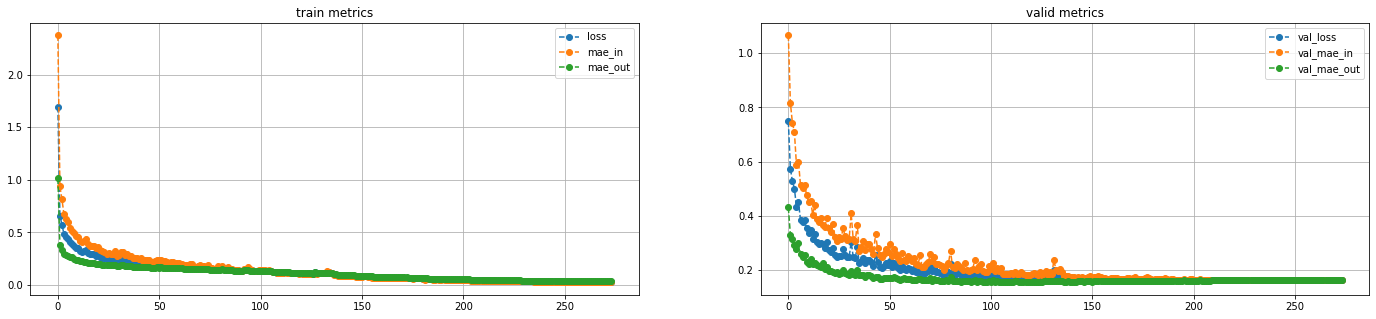

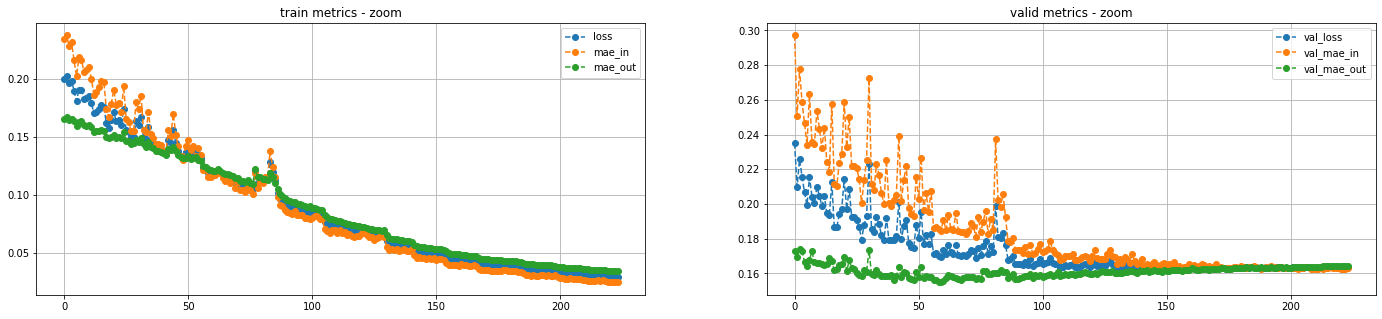

Fold8 mae: 0.16255368292331696
----------------------------------- Fold: 10 -----------------------------------
Epoch 1/300
133/133 [==============================] - 147s 624ms/step - loss: 1.5851 - mae_in: 2.2916 - mae_out: 0.8786 - val_loss: 0.7482 - val_mae_in: 1.0694 - val_mae_out: 0.4269
Epoch 2/300
133/133 [==============================] - 36s 268ms/step - loss: 0.6635 - mae_in: 0.9497 - mae_out: 0.3774 - val_loss: 0.5589 - val_mae_in: 0.7929 - val_mae_out: 0.3248
Epoch 3/300
133/133 [==============================] - 36s 268ms/step - loss: 0.5466 - mae_in: 0.7751 - mae_out: 0.3181 - val_loss: 0.5153 - val_mae_in: 0.7311 - val_mae_out: 0.2994
Epoch 4/300
133/133 [==============================] - 36s 269ms/step - loss: 0.5092 - mae_in: 0.7203 - mae_out: 0.2981 - val_loss: 0.4651 - val_mae_in: 0.6482 - val_mae_out: 0.2821
Epoch 5/300
133/133 [==============================] - 36s 269ms/step - loss: 0.4598 - mae_in: 0.6377 - mae_out: 0.2818 - val_loss: 0.4666 - val_mae_in: 0.6415

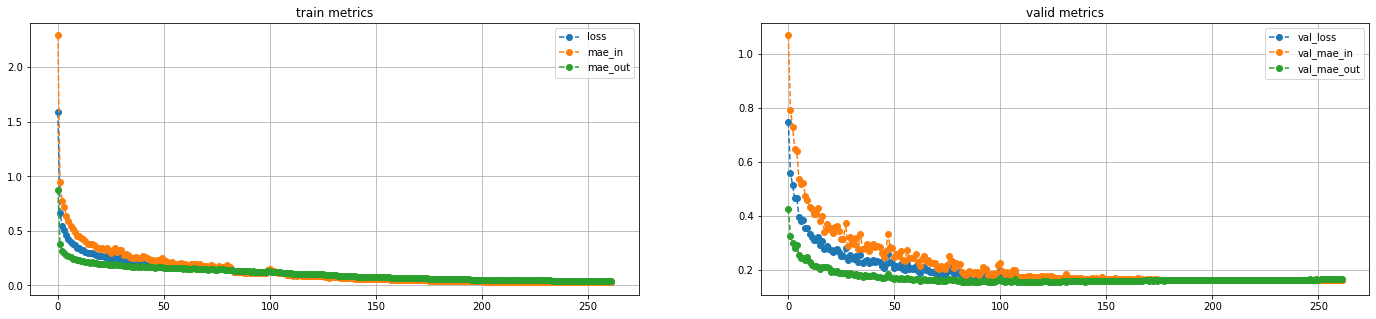

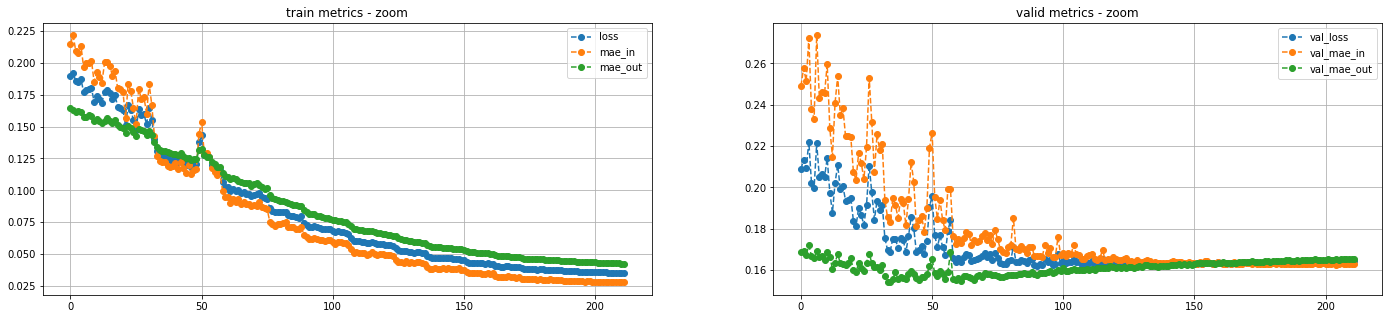

Fold9 mae: 0.16291871666908264


In [20]:
models_by_fold = list()

for fold in range(len(split)):
    print(f" Fold: {fold+1} ".center(80, "-"))
    
    train_idx = split[f"fold-{fold}"]["train"]
    valid_idx = split[f"fold-{fold}"]["valid"]

    X_train, X_valid = train[train_idx], train[valid_idx]
    y_train, y_valid = targets[train_idx], targets[valid_idx]

    mask_in_train, mask_in_valid = mask_in[train_idx], mask_in[valid_idx]
    mask_out_train, mask_out_valid = mask_out[train_idx], mask_out[valid_idx]

    model_path = f"{artifacts_path}/{config.MODEL_ID}_fold{fold}"

    if len(glob(f"{model_path}*")) >= 2:
        print("Found an already trained model!")
        with tpu_strategy.scope():
            model = LSTMGRU2Heads()
            load_locally = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
            model.load_weights(model_path, options=load_locally)
        do_train = False
    else:
        do_train = True

    if do_train:

        lr = ReduceLROnPlateau(
            monitor="val_mae_in", 
            factor=config.SCHEDULER_FACTOR, 
            patience=config.SCHEDULER_PATIENCE, 
            verbose=1,
            min_lr=1e-4,
            min_delta=0.0001,
        )
        es = EarlyStopping(
            monitor='val_mae_in', 
            mode='min', 
            patience=config.STOPPING_PATIENCE, 
            min_delta=0.0001,
            verbose=1,
            restore_best_weights=True,
        )

        with tpu_strategy.scope():
            model = LSTMGRU2Heads()
            optimizer = tf.optimizers.Adam(learning_rate=1e-3)
            model.compile(optimizer=optimizer,)

            history = model.fit(
                [X_train,mask_in_train,mask_out_train], 
                y_train, 
                validation_data=([X_valid,mask_in_valid,mask_out_valid], y_valid), 
                epochs=config.EPOCHS,
                batch_size=config.BATCH_SIZE, 
                callbacks=[es,lr],
                shuffle=True,
                verbose=1,
            )

        save_locally = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')
        model.save_weights(model_path, options=save_locally, overwrite=True, save_format="tf")

        # metrics from epoch 0 ->
        plt.figure(figsize=(24,5))
        plt.subplot(1,2,1)
        plt.title("train metrics")
        plt.plot(history.history["loss"], "o--", label="loss")
        plt.plot(history.history["mae_in"], "o--", label="mae_in")
        plt.plot(history.history["mae_out"], "o--", label="mae_out")
        plt.grid()
        plt.legend(loc="best")

        plt.subplot(1,2,2)
        plt.title("valid metrics")
        plt.plot(history.history["val_loss"], "o--", label="val_loss")
        plt.plot(history.history["val_mae_in"], "o--", label="val_mae_in")
        plt.plot(history.history["val_mae_out"], "o--", label="val_mae_out")
        plt.grid()
        plt.legend(loc="best")
        plt.show()

        # metrics from epoch 50 ->
        plt.figure(figsize=(24,5))
        plt.subplot(1,2,1)
        plt.title("train metrics - zoom")
        plt.plot(history.history["loss"][50:], "o--", label="loss")
        plt.plot(history.history["mae_in"][50:], "o--", label="mae_in")
        plt.plot(history.history["mae_out"][50:], "o--", label="mae_out")
        plt.grid()
        plt.legend(loc="best")

        plt.subplot(1,2,2)
        plt.title("valid metrics - zoom")
        plt.plot(history.history["val_loss"][50:], "o--", label="val_loss")
        plt.plot(history.history["val_mae_in"][50:], "o--", label="val_mae_in")
        plt.plot(history.history["val_mae_out"][50:], "o--", label="val_mae_out")
        plt.grid()
        plt.legend(loc="best")
        plt.show()

    # generate the oof predictions
    oof_preds = model(tf.convert_to_tensor(X_valid))[0].numpy().squeeze()
    idx = oof.query("breath_id in @valid_idx").index
    oof.loc[idx, "pred"] = oof_preds.ravel()
    oof.loc[idx, "fold"] = fold

    mae = oof.loc[idx].query("u_out == 0").eval("abs(pressure - pred)").mean()
    print(f"Fold{fold} mae: {mae}")
    
    models_by_fold.append(model)

In [21]:
print("mae:", oof.eval("abs(pressure - pred)").mean())
print("mae inspiratory:", oof.query("u_out == 0").eval("abs(pressure - pred)").mean())
print("mae expiratory :", oof.query("u_out == 1").eval("abs(pressure - pred)").mean())

mae: 2.995819330215454
mae inspiratory: 0.16164806485176086
mae expiratory : 4.768802165985107


***
## sub generation

In [22]:
all_preds = list()
test_tf = tf.convert_to_tensor(test, dtype=tf.float32)

for model in tqdm(models_by_fold):
    preds = model.call(test_tf)[0].numpy().squeeze().ravel()
    all_preds.append(preds)

test_raw["pressure"] = np.median(all_preds, axis=0)

100%|██████████| 10/10 [39:59<00:00, 239.97s/it]


In [23]:
# saves final sub
sub = pd.merge(submission["id"], test_raw[["id","pressure"]], how="left", on="id")
sub["pressure"] = sub["pressure"].fillna(0)
sub.to_csv(f"{subs_path}/sub_{config.MODEL_ID}.csv", index=False)

sub["pressure"] =\
    np.round( (sub.pressure - PRESSURE_MIN)/PRESSURE_STEP ) * PRESSURE_STEP + PRESSURE_MIN
sub.pressure = np.clip(sub.pressure, PRESSURE_MIN, PRESSURE_MAX)
sub.to_csv(f"{subs_path}/sub_{config.MODEL_ID}_clip.csv", index=False)

In [24]:
# saves oof preds
oof.to_csv(f"{results_path}/oof_{config.MODEL_ID}.csv", index=False)

In [25]:
# saves each model preds (pseudo labels)
for fold,preds in enumerate(all_preds):
    file_path = f"{results_path}/predictions_{config.MODEL_ID}_{fold}.csv"
    if os.path.isfile(file_path):
        continue
    _sub = submission.copy()
    _test = test_raw[["id","pressure"]].copy()
    _test["pressure"] = preds
    _sub = pd.merge(_sub["id"], _test[["id","pressure"]], how="left", on="id")
    _sub["pressure"] = _sub["pressure"].fillna(0)
    _sub.to_csv(file_path, index=False)

***